Visualizing Hidden Layers

In [421]:
import torch
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

In [491]:
x_features = 20
z1_features = 3
z2_features = 3
y_features = 1

number_of_examples = 500

X = torch.from_numpy(np.random.randn(number_of_examples, x_features)).float()
y = (X.sum(axis=1) > 3).view(-1, 1).float() #torch.from_numpy(np.random.rand(number_of_examples, y_features) < 0.5).float()

In [492]:
layer0 = torch.nn.Sequential(
    torch.nn.Linear(x_features, z1_features),
    torch.nn.ReLU(),
)

layer1 = torch.nn.Sequential(
    torch.nn.Linear(z1_features, z2_features),
    torch.nn.ReLU(),
)

layer2 = torch.nn.Sequential(
    torch.nn.Linear(z2_features, y_features),
    torch.nn.Sigmoid(),
)

model = torch.nn.Sequential(
    layer0,
    layer1,
    layer2,
)

number_of_epochs = 500
learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_function = torch.nn.BCELoss()


def fit():
    for epoch in range(number_of_epochs):
        yp = model(X)
        loss = loss_function(yp, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if (epoch % 100 == 0):
            print(f'[Epoch {epoch + 1}/{number_of_epochs}] loss: {loss.item()}, accuracy: {(model(X).round() == y).to(float).mean()}')
    
    print(f'[Finished] loss: {loss.item()}, accuracy: {(model(X).round() == y).to(float).mean()}')

In [493]:
fit()

[Epoch 1/500] loss: 0.8950743675231934, accuracy: 0.226
[Epoch 101/500] loss: 0.12906716763973236, accuracy: 0.98
[Epoch 201/500] loss: 0.055117905139923096, accuracy: 0.988
[Epoch 301/500] loss: 0.014579535461962223, accuracy: 0.998
[Epoch 401/500] loss: 0.008911808021366596, accuracy: 0.998
[Finished] loss: 0.006292393896728754, accuracy: 0.998


In [494]:
pca_x = PCA(n_components=2)
pca_x.fit(X)

pca_z1 = PCA(n_components=2)
pca_z1.fit(layer0(X).detach().numpy())

pca_z2 = PCA(n_components=2)
pca_z2.fit(layer1(layer0(X)).detach().numpy())

PCA(n_components=2)

<Axes: >

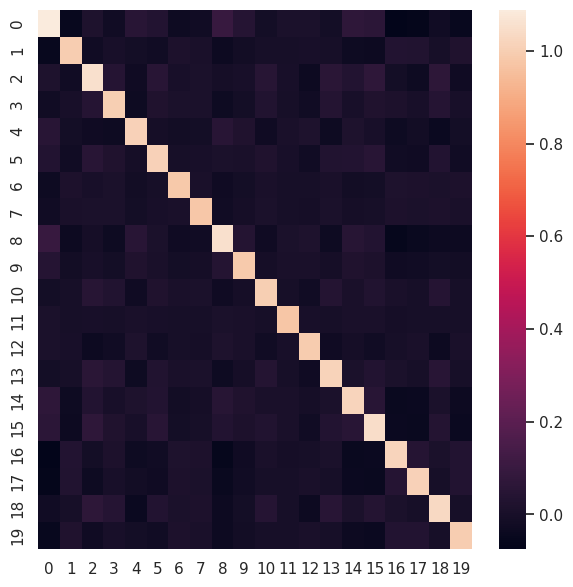

In [495]:
sns.heatmap(pca_x.get_covariance())

<Axes: >

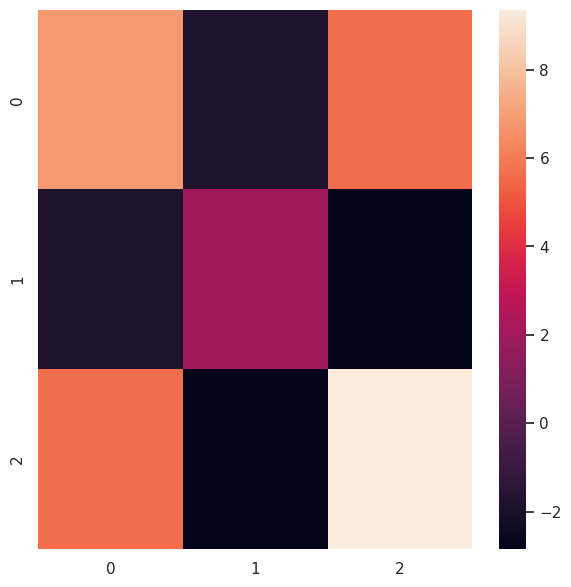

In [496]:
sns.heatmap(pca_z1.get_covariance())

<Axes: >

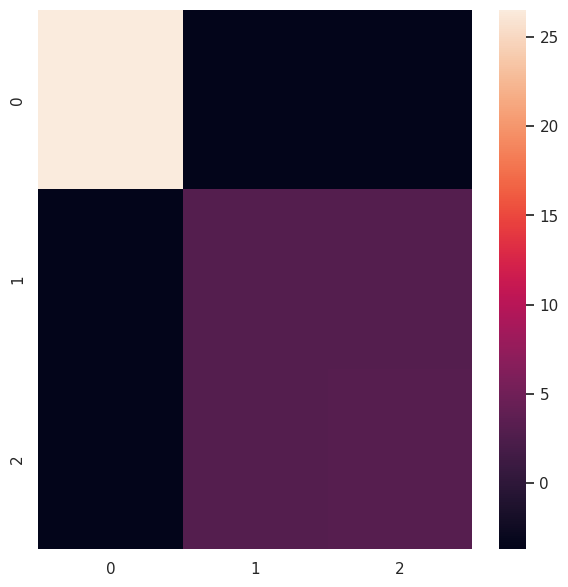

In [497]:
sns.heatmap(pca_z2.get_covariance())

In [498]:
xa = X
z1a = layer0(xa)
z2a = layer1(z1a)
ya = layer2(z2a)

z1a = z1a.detach().numpy()
z2a = z2a.detach().numpy()

<Axes: >

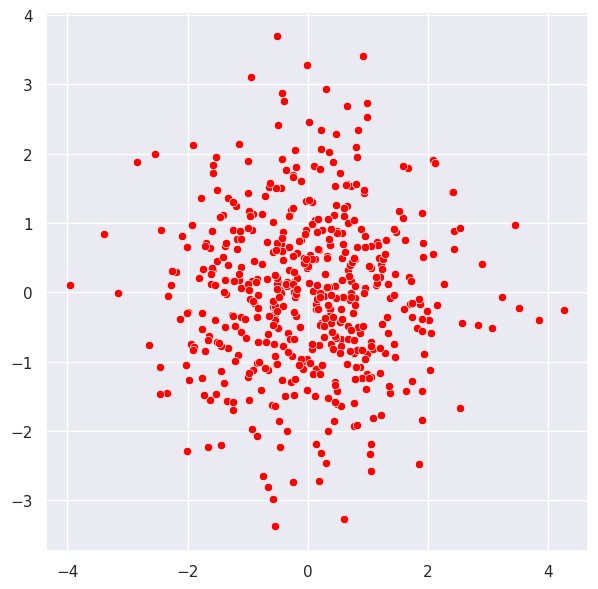

In [499]:
sns.set(rc={'figure.figsize': (7, 7)})

sns.scatterplot(x=pca_x.transform(xa).T[0], y=pca_x.transform(xa).T[1], color='red')

<Axes: >

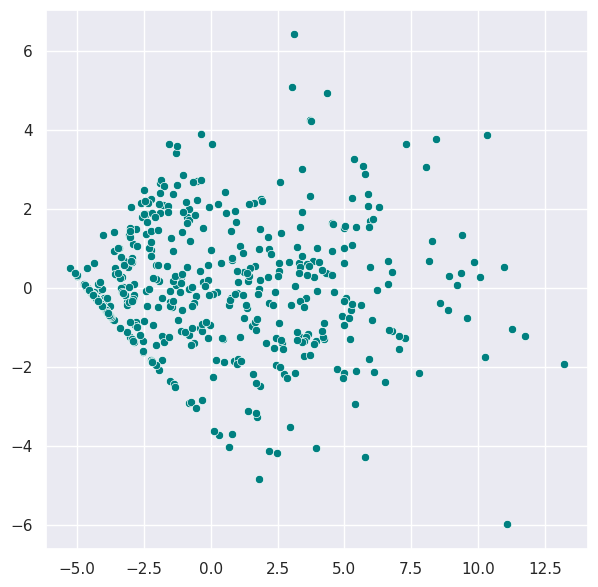

In [500]:
sns.scatterplot(x=pca_z1.transform(z1a).T[0], y=pca_z1.transform(z1a).T[1], color='teal')

<Axes: >

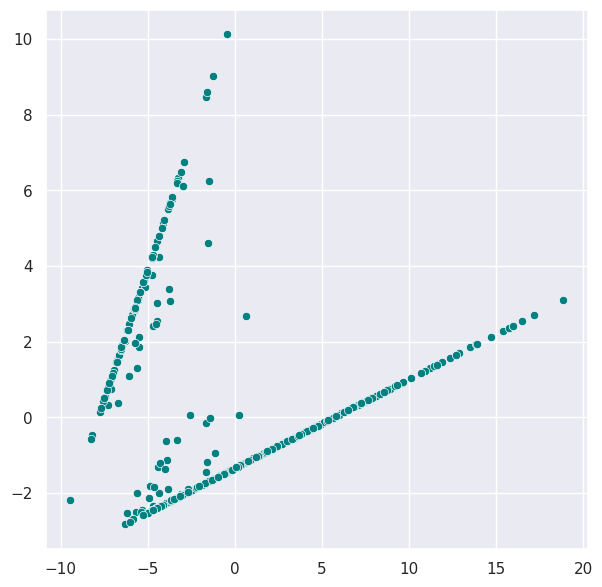

In [501]:
sns.scatterplot(x=pca_z2.transform(z2a).T[0], y=pca_z2.transform(z2a).T[1], color='teal')

layer2.

In [479]:
list(layer2.parameters())

[Parameter containing:
 tensor([[-0.5552, -3.3659,  0.1072]], requires_grad=True),
 Parameter containing:
 tensor([0.7628], requires_grad=True)]